## Predicting  whether a person has diabetes or not, based on information about the patient on Healthcare dataset using Machine Learning algorithms.
<b> In this article, I am using Healthcare dataset as "diabetes.csv".     
    
<b>  In this article, we are going to predict whether a person has diabetes or not, based on information about the patient such as blood pressure, body mass index (BMI), age, etc. on Healthcare dataset using Machine Learning algorithms. The algorithms included Logistic Regression.


## Step - 1 : Business Problem Understanding
- <b> predict whether a person has diabetes or not (Outcome), based on information about the patient such as blood pressure, body mass index (BMI), age, Pregnancies, Glucose, SkinThickness, Insulin and DiabetesPedigreeFunction.
    
- <b> On the basis of this data, how should they predict diabetes (Outcome) ? These general questions might lead me to more specific questions :
    
   1. Is there a relationship between each variables (blood pressure, body mass index (BMI), age, Pregnancies, Glucose, SkinThickness, Insulin and DiabetesPedigreeFunction.) and Outcome (predicting whether patient have diabetic or not) ?
   2. How strong is that relationship ?
   3. Which variables contribute to Outcome (predicting whether patient have diabetic or not) ?
   4. What is the effect of each variables on Outcome (predicting whether patient have diabetic or not) ?


<b> importing all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

<b> In the above, i have imported all the necessary libraries.

## Step - 2 : Data Understanding
### 2.1 Data Collection
<b>Load the dataset by using read_csv() to read the dataset and save it to the 'df' variable and take a look at the first 5 lines using the head() method.

In [2]:
# Load the dataset.
df = pd.read_csv("diabetes.csv")

# Display the first 5 lines using the head() method.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2.2 Data Understanding
<b> Let’s have a look at data dimensionality.

In [4]:
df.shape

(768, 9)

<b> From the output, we can see that the table contains 768 rows and 9 columns.
    
    
<b> We can use the info() method to output some general information about the dataframe :

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<b> int64 and float64 are the data types of our features. We see that 9 features are numeric (7 features are int64 + 2 features are float64). With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 768 observations, the same number of rows we saw before with shape.
    
    
<b> Here 9 variables or features (columns) are there, 9 features are numeric (7 features are int64 + 2 features are float64). The details of these variables as follows :
    
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)2)
- DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
- Age: Age (years)
- Outcome: Class variable (0 if non-diabetic, 1 if diabetic)
    

## Step - 3 : Data Preprocessing
### 3.1 Exploratory Data Analysis (EDA)
- <b> On the basis of this data, how should they predict diabetes (Outcome) ? These general questions might lead me to more specific questions :
    
   1. Is there a relationship between each variables (blood pressure, body mass index (BMI), age, Pregnancies, Glucose, SkinThickness, Insulin and DiabetesPedigreeFunction.) and Outcome (predicting whether patient have diabetic or not) ?
   2. How strong is that relationship ?
   3. Which variables contribute to Outcome (predicting whether patient have diabetic or not) ?
   4. What is the effect of each variables on Outcome (predicting whether patient have diabetic or not) ?

   

<b> The describe method shows basic statistical characteristics of each numerical feature (int64 and float64 types): count, mean, standard deviation, min, max, median, 0.25 and 0.75 quartiles.

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<b> Now use the value_counts method on outcome variable.

In [9]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<b> 500 persons out of 768 are non-diabetic and 268 are diabetic.
    

<b> Checking the correlation between variables by using corr().

In [3]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<b> Checking the correlation of every pair of features (and the Outcome variable), and visualize the correlations using a heatmap.

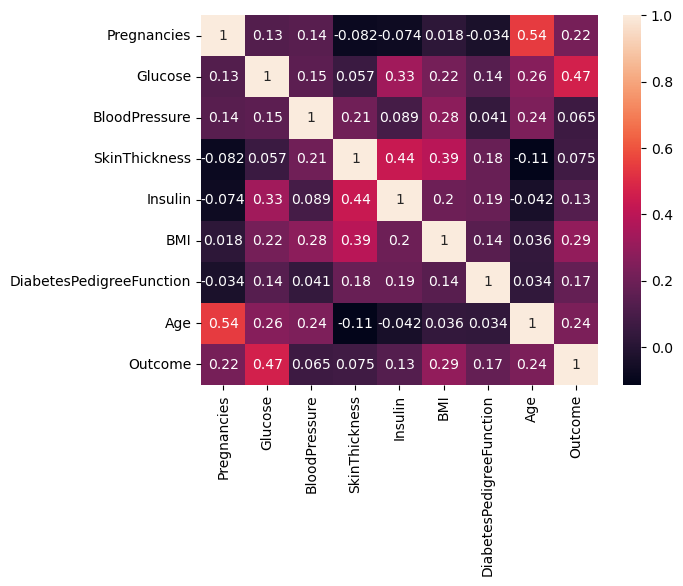

In [11]:
# calculate the correlation between variables and store it in "corr" object.
corr = df.corr()

# plotting correlation heatmap.
# Set annot=True.
sns.heatmap(corr, annot=True)

# displaying heatmap
plt.show()

- <b> In the above heatmap, brighter colors indicate more correlation. As we can see from the table and the heatmap, glucose levels, age, BMI and number of pregnancies all have significant correlation with the outcome variable. Also notice the correlation between pairs of features, like age and pregnancies, or insulin and skin thickness.

- <b> The relationship between dependent (Outcome) and independent (blood pressure, body mass index (BMI), age, Pregnancies, Glucose, SkinThickness, Insulin and DiabetesPedigreeFunction) variables should be high. The higher relationship gives the stronger the correlation and accuracy.
    
- <b> The relationship between any two independent variables should be low, it will gives the low accuracy.


<b> Let’s also look at how many people in the dataset are diabetic and how many are not. Below is the barplot of the same :

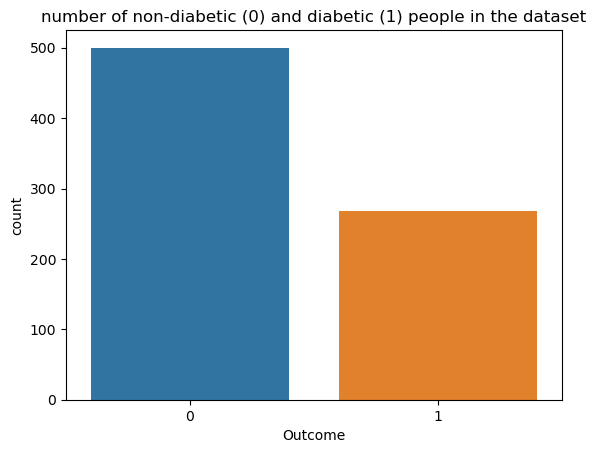

In [14]:
# Plot the Bar Plot on "Outcome" dependent variable.
sns.countplot(x="Outcome", data=df)

# Set title of the plot
plt.title("number of non-diabetic (0) and diabetic (1) people in the dataset")

# Display all figures.
plt.show()

<b> In the above Barplot, we can see that the number of non-diabetic (0) is more as compare to number of diabetic (1).

### 3.2 Data Cleaning
<b> Checking the Empty cells / Missing values :
- The isnull().sum() method returns the total number of missing values (count) present in the each column.

In [15]:
# Check the missing values records.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<b> In the above, we can see that there is no missing values.
    

### 3.3 Data Wrangling
<b> No encoding is required here.

### 3.4 Train/Test Split
<b> Creating independent variables ("Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age") as "x" variable and dependent variable "Outcome" as "y" variable.

In [4]:
# Create x and y variables.
x = df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", 
            "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]]   # independent variables
y = df["Outcome"]                                                   # dependent variable

<b> In the above, I have created x variable with 8 independent (input) variables and y variable with 1 dependent (output) variable.

In [5]:
# import train_test_split from scikit-learn.
from sklearn.model_selection import train_test_split

# Apply the train_test_split() function.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=9)

In the first line of the above code, we have imported the train_test_split function from the sklearn library.


In the second line, we have used four variables, which are :

   - x_train: It is used to represent features for the training data
   - x_test: It is used to represent features for testing data
   - y_train: It is used to represent dependent variables for training data
   - y_test: It is used to represent independent variable for testing data
   
   
In the train_test_split() function, we have passed four parameters. In which first two are for arrays of data, and test_size is for specifying the size of the test set which tells the dividing ratio of training and testing sets. The last parameter, random_state, is used to set a seed for a random generator so that you always get the same result.

<b> View the dimensions of x_train, x_test, y_train, y_test

In [19]:
x_train.shape, x_test.shape

((614, 8), (154, 8))

In [20]:
y_train.shape, y_test.shape

((614,), (154,))

## Step - 4 : Modelling :
<b> Logistic Regression (Baseline Model)

In [6]:
# Modelling
# import the LogisticRegression from sklearn.linear_model library.
from sklearn.linear_model import LogisticRegression

# save (initialize) the model as "log_model".
log_model = LogisticRegression()

# Train the model using training sets
log_model.fit(x_train, y_train)


LogisticRegression()

<b> Hence our model is well fitted to the training set.

## Prediction

In [7]:
# Predict on the train data set.
train_predictions = log_model.predict(x_train)

# Predict on the test data set.
test_predictions = log_model.predict(x_test)

<b> In the above code, we have created a "train_predictions" vector to predict the train set result and "test_predictions" vector to predict the test set result.

## Step - 5 : Evaluation :
<b> 1. Train & Test Accuracy

In [10]:
# import the accuracy_score class from sklearn.metrics library
from sklearn.metrics import accuracy_score

# print the train accuary
print("Train_accuracy:", accuracy_score(y_train, train_predictions))

# print the test accuracy
print("Test_accuracy:", accuracy_score(y_test, test_predictions))

Train_accuracy: 0.7980456026058632
Test_accuracy: 0.7662337662337663


<b> 2. Cross Validation Score (CV)

In [11]:
# import the cross_val_score class from sklearn.model_selection library
from sklearn.model_selection import cross_val_score

# Apply the cross_val_score() function and print the result.
print("Cross Validation Score:", cross_val_score(log_model, x, y, cv=5).mean())

Cross Validation Score: 0.7695696460402341


<b> Logistic Regression with default parameters, the training set and testing set performances are comparable. From the above we conclude that, we have got a good model on train and test data sets. We got an train accuracy of 79.80%, test accuracy of 76.62% and cross validate score of 76.95% with this model.

<b> 3. Confusion Matrix 
- Now we will create the confusion matrix here to check the accuracy of the classification. To create it, we need to import the confusion_matrix function of the sklearn library. After importing the function. The function takes two parameters, mainly y_test( the actual values) and test_predictions (the targeted value return by the classifier). Below is the code for it :

In [15]:
# Creating the Confusion matrix 

# import the confusion_matrix class from sklearn.metrics library
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
# And pass the parameters.
confusion_matrix(y_test, test_predictions)


array([[85, 15],
       [21, 33]], dtype=int64)

<b> We can find the accuracy of the predicted result by interpreting the confusion matrix. By above output, we can interpret that 85+33=118 (Correct Output) and 21+15=36 (Incorrect Output).

<b> 4. Classification Report
- Now we are building the text report showing the main classification metrics, it will returns the text summary of the precision, recall, F1 score for each class.

In [18]:
# import the classification_report class from sklearn.metrics library
from sklearn.metrics import classification_report

# Calculate the classification_report
# pass the arrays (y_test and test_prediction)
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       100
           1       0.69      0.61      0.65        54

    accuracy                           0.77       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.77      0.76       154



<b> 5. AUC-ROC
- It is one of the popular and important metrics for evaluating the performance of the classification model.
    

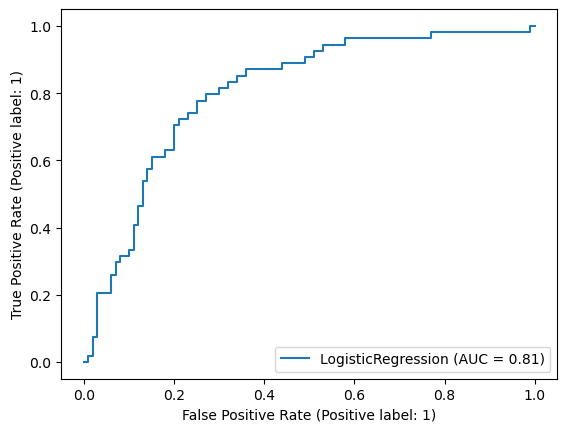

In [19]:
# import the plot_roc_curve class from sklearn.metrics library
from sklearn.metrics import plot_roc_curve

# plot the roc curve.
plot_roc_curve(log_model, x_test, y_test)

<b> The AUC-ROC curve result is 0.81, the AUC-ROC curve results were considered good for AUC values between 0.8-0.9. So it is a good model.